# Labeling: Raw Returns

![image_example](img/Raw_returns_distribution.png)
_*Fig. 1:*_ Distribution of daily logarithmic returns for MSFT between Jan 2010 and May 2020.


## Abstract

Labeling data by raw returns is the most simple and basic method of labeling financial data for machine learning. Raw returns can be calculated either on a percentage or logarithmic basis. Using returns rather than raw prices is usually preferred for financial data analysis due to returns being automatically scaled with respect to the underlying. Additionally, unlike prices, returns can be negative, which carries a statistically distinct meaning compared to positive values.


## How it works

The percentage raw return for an observation with
price $p_t$ at time $t$ relative to its price at time $t-1$ is as follows:

$$
    r_t = \frac{p_{t}}{p_{t-1}} - 1
$$

In the logarithmic case:

$$
    r_t = \log \frac{p_{t}}{p_{t-1}}
$$

Returns can also be calculated relative to multiple ticks prior to the observation, instead of just one. If desired, the labels
can be given as a sign of the return, rather than the magnitude. In this case:

$$
     \begin{equation}
     \begin{split}
       L_{t} = \begin{cases}
       -1 &\ \text{if} \ \ r_t < 0\\
       0 &\ \text{if} \ \ r_t = 0\\
       1 &\ \text{if} \ \ r_t > 0
       \end{cases}
     \end{split}
     \end{equation}
$$
---
## Examples of use

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from mlfinlab.labeling import raw_return

import matplotlib.pyplot as plt

In [2]:
# Load price data
msft = yf.Ticker('MSFT')
msft_df = msft.history(start='2010-1-1', end ='2020-5-18')

# Subset closing prices
close = msft_df['Close']
close.head()

Date
2010-01-04    24.23
2010-01-05    24.23
2010-01-06    24.09
2010-01-07    23.84
2010-01-08    24.00
Name: Close, dtype: float64

We can plot the distribution of logarithmic returns for MSFT stock from 2010-2020.

Text(0.5, 0, 'Daily Log Return')

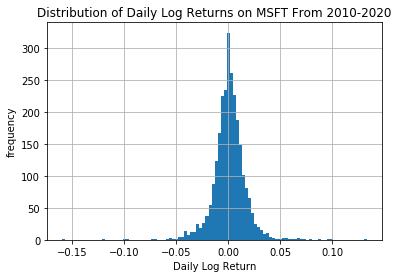

In [3]:
returns1 = raw_return(close, logarithmic=True)
ax = returns1.hist(bins=100)
ax.set_title("Distribution of Daily Log Returns on MSFT From 2010-2020")
ax.set_ylabel("frequency")
ax.set_xlabel("Daily Log Return")

We can also get categorical labels. Note that because on a few days the price did not change at all, np.sign gives a warning for zero values, but this is not actually an error.

In [4]:
returns2 = raw_return(close, logarithmic=True, binary=True)
returns2.value_counts()

 1.0    1358
-1.0    1219
 0.0      32
Name: Close, dtype: int64

We can see that over this time period, MSFT had a positive daily return about 52% of the time and a negative daily return about 47% of the time.

### Error Handling

The lookback period is the number of ticks to look back when calculating the return of each observation, which is set to 1 by default. If the lookback is greater than the number of rows in the data, a warning is given and all labels will be NaN.

In [5]:
raw_return(close[:10], lookback=999)

c:\users\ruifan\mlfinlab\mlfinlab\labeling\raw_return.py:31: UserWarning: lookback period is greater than the length of the Series. All labels will be NaN.
  UserWarning)


Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
Name: Close, dtype: float64

---
## Conclusion

This notebook presents the raw returns labeling method, which is the most basic and ubiquitous method used in financial data analysis. In this method, the return for an asset on a given day is calculated as a ratio of the asset's price on that day to the price on the previous day(s). This labeling method is a precursor to almost kind of financial analysis and is itself the first step in many other more complicated labeling techniques.

## References

Coqueret, G. and Guida, T., 2020. Machine Learning For Factor Investing.